In [7]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine, inspect
import matplotlib.pyplot as plt

import matplotlib.patches as patches



In [8]:
user = "neondb_owner"
password = np.loadtxt("./neon_password.txt", dtype=str)
host = "ep-wild-night-a9bq078j-pooler.gwc.azure.neon.tech"
db = "xG"
engine = create_engine(f'postgresql://{user}:{password}@{host}/{db}')

inspector = inspect(engine)

In [9]:
shots   = pd.read_sql("game_shots", con=engine)
teams   = pd.read_sql("teams", con=engine)
players = pd.read_sql("players", con=engine)

In [10]:
shots.head()

,id,game_id,player_id,team_id,minute,compensation,x_coord,y_coord,body_part,playtype,...,defenders_in_front_of_goal,assister_id,pass_height,pass_progression,pass_distance,gk_id,gk_x_coord,gk_y_coord,betrayal,on_feet
0,1,1,75,1,2,0,10.0,42.0,Left Foot,Organized Offense,...,1,85.0,High,30.0,Mid,88,3,51,False,True
1,2,1,48,1,8,0,2.0,46.0,Head,Dead Ball,...,0,74.0,High,0.0,Long,88,2,47,False,True
2,3,1,97,5,11,0,-7.0,43.0,Head,Dead Ball,...,0,111.0,High,60.0,Long,43,-2,51,False,True
3,4,1,80,1,15,0,7.0,44.0,Right Foot,Organized Offense,...,1,75.0,Floor,0.0,Short,88,4,50,False,True
4,5,1,80,1,31,0,16.0,42.0,Right Foot,After Defense Turnover,...,0,NaN,None,None,None,88,4,50,False,True


In [20]:
def half_field(l=105, w=68):
    
    bal, baw = 16.5, 40 #big area dimensions
    sal, saw = 5.5, 18 #small area dimensions
    gw = 7.3 #goal width
    ps = 11 # penalty spot
    hcr = 9.15 #half circle radius
    size = 10
    ratio = l/(2*w)

    fig = plt.figure(figsize=(size, size*ratio))
    ax = plt.Axes(fig, [0., 0., 1., 1.])
    fig.add_axes(ax)
    ax.set_facecolor("green")
    
    ax.set_xticks([])
    ax.set_yticks([])
    for spine in ax.spines.values():
        spine.set_visible(False)

    #field
    ax.hlines(y=[0, l/2, l/2-bal, l/2-sal], 
               xmin=[-w/2, -w/2, -baw/2, -saw/2], 
               xmax=[w/2, w/2, baw/2, saw/2],
               color="white", zorder=1)
    ax.vlines(x=[-w/2, w/2, -baw/2, baw/2, -saw/2, saw/2], 
               ymin=[0, 0, l/2, l/2, l/2, l/2], 
               ymax=[l/2, l/2, l/2-bal, l/2-bal, l/2-sal, l/2-sal],
               color="white", zorder=1)
    
    #goal
    ax.hlines(y=l/2+1, xmin=-gw/2, xmax=gw/2, color="white", zorder=1)
    ax.vlines(x=[-gw/2, gw/2], ymin=l/2, ymax=l/2+1, color="white", zorder=1)
    
    #spots
    ax.scatter(x=[0, 0], y=[0, l/2-ps], s=10, 
               color="white", zorder=1)

    #half_circle
    arc = patches.Arc((0, l/2-ps), 2*hcr, 2*hcr, angle=0, theta1=217, theta2=323, 
                      color="white", zorder=1)
    ax.add_patch(arc)

    #corners
    rcorner = patches.Arc((w/2, l/2), 2, 2, angle=0, theta1=180, theta2=270, 
                      color="white", zorder=1)
    lcorner = patches.Arc((-w/2, l/2), 2, 2, angle=0, theta1=270, theta2=360, 
                      color="white", zorder=1)
    ax.add_patch(rcorner)
    ax.add_patch(lcorner)
    
    # big area arc (on top of the big box)
    big_arc = patches.Arc((0, 0), 2*hcr, 2*hcr, angle=0, theta1=0, theta2=180, 
                          color="white", zorder=1)
    ax.add_patch(big_arc)
    
    #setup
    plt.axis("tight")
    return fig, ax

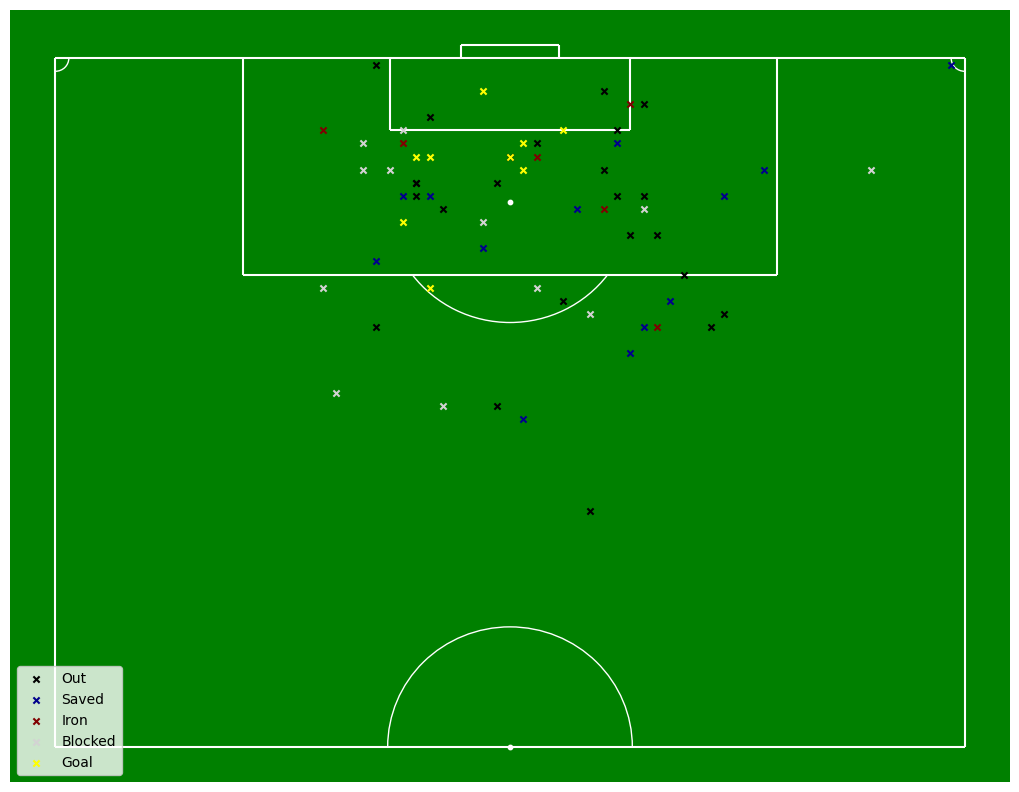

In [29]:
fig, ax = half_field()
colors = ["black", "darkblue", "maroon", "lightgrey", "yellow"]
for i, out in enumerate(shots.shot_outcome.unique()):
    cond = shots.shot_outcome == out
    ax.scatter(shots.x_coord[cond], shots.y_coord[cond], color=colors[i], 
               s=20, zorder=2, label=out, marker="x")
plt.legend()


In [28]:

shots.shot_outcome.unique()

array(['Out', 'Saved', 'Iron', 'Blocked', 'Goal'], dtype=object)